# Visualizing Euro exchange rates (1999 - 2023)

In this project, we are going to visulize the exchange rates of Euro against the Indian rupee and try to find insights from it.

The dataset we'll use describes Euro daily exchange rates between 1999 and 2023. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

# Reading the dataset

In [1]:
import pandas as pd
euro = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\euro_exchange_rates.csv')

# Exploring the dataset

In [2]:
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6229 non-null   object 
 1   [Australian dollar ]      6229 non-null   object 
 2   [Bulgarian lev ]          5827 non-null   object 
 3   [Brazilian real ]         5961 non-null   object 
 4   [Canadian dollar ]        6229 non-null   object 
 5   [Swiss franc ]            6229 non-null   object 
 6   [Chinese yuan renminbi ]  5961 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6229 non-null   object 
 9   [Danish krone ]           6229 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6229 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6229 non-null   object 
 14  [Croatia

# Changing datatypes

We can see that baring two columns, every other column is type 'object'. We will change the currencies to float and date to datetime.

In [3]:
euro.rename(columns={"Period\\Unit:":"time", "[Indian rupee ]":"indian_rupee"}, inplace=True)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
euro["time"] = pd.to_datetime(euro["time"])

In [6]:
euro["time"].dtype

dtype('<M8[ns]')

In [7]:
euro.sort_values("time", inplace=True)
euro.reset_index(drop=True, inplace=True)

# Isolating the time and Indian rupee data

In [8]:
euro_rupee = euro[["time", "indian_rupee"]]

In [9]:
euro_rupee["indian_rupee"].value_counts()

-         61
55.047     3
56.598     3
58.001     3
70.11      3
          ..
63.478     1
64.297     1
68.256     1
65.805     1
87.783     1
Name: indian_rupee, Length: 5645, dtype: int64

# Removing the '-' character from Indian rupee data

In [10]:
euro_rupee = euro_rupee[euro_rupee["indian_rupee"] != '-']

In [11]:
euro_rupee["indian_rupee"] = euro_rupee["indian_rupee"].astype('float64')

In [12]:
euro_rupee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6168 entries, 0 to 6228
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          6168 non-null   datetime64[ns]
 1   indian_rupee  5900 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 144.6 KB


# Visualizing the exchange rate between euro and rupee


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

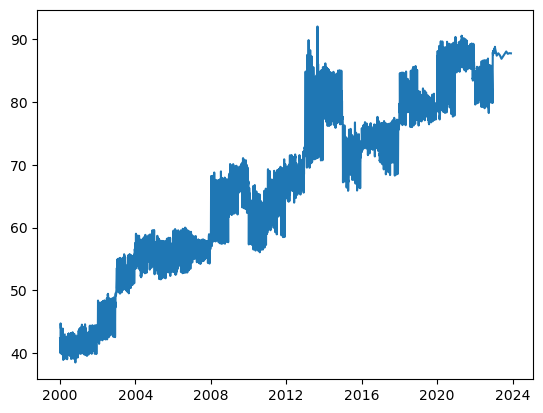

In [14]:
plt.plot(euro_rupee["time"], euro_rupee["indian_rupee"])
plt.show()

The plot could benefit from improved visual clarity. One way to achieve this would be to calculate the 30-day rolling mean.


# Calculating rolling mean with different rolling windows

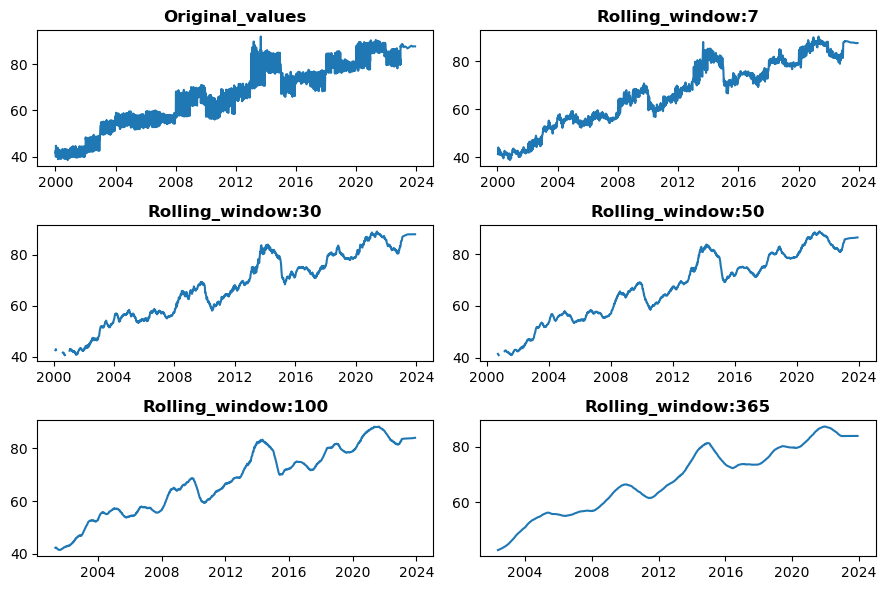

In [15]:
plt.figure(figsize=(9, 6))
plt.subplot(3, 2, 1)
plt.plot(euro_rupee["time"], euro_rupee["indian_rupee"])
plt.title("Original_values", weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_rupee["time"], euro_rupee["indian_rupee"].rolling(rolling_mean).mean())
    plt.title("Rolling_window:" + str(rolling_mean), weight='bold')
    
plt.tight_layout() #Auto-adjusts the padding between subplots
plt.show()

We can see that the value of Euro against the Indian rupee has steadily increased throughout the years.

Let's now examine the percentage increase in the Euro-Rupee conversion rate over four-year intervals using rolling mean with a rolling window of 50 days starting 2004.

In [16]:
euro_rupee_04_08 = euro_rupee[euro_rupee["time"].between(pd.to_datetime('2004-01-01'), pd.to_datetime('2007-12-31'))]
euro_rupee_08_12 = euro_rupee[euro_rupee["time"].between(pd.to_datetime('2008-01-01'), pd.to_datetime('2011-12-31'))]
euro_rupee_12_16 = euro_rupee[euro_rupee["time"].between(pd.to_datetime('2012-01-01'), pd.to_datetime('2015-12-31'))]
euro_rupee_16_20 = euro_rupee[euro_rupee["time"].between(pd.to_datetime('2016-01-01'), pd.to_datetime('2019-12-31'))]
euro_rupee_20_24 = euro_rupee[euro_rupee["time"].between(pd.to_datetime('2020-01-01'), pd.to_datetime('2023-12-31'))]

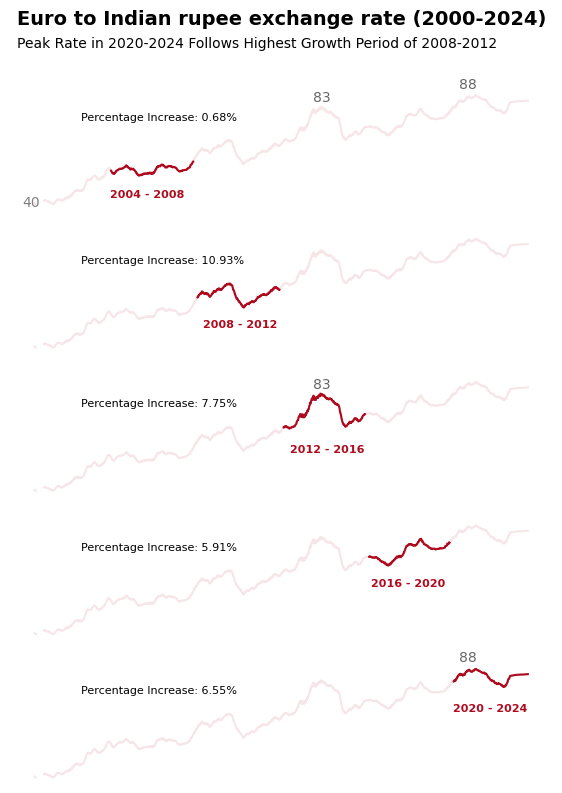

In [79]:
percentage_increase = [0.68, 10.93, 7.75, 5.91, 6.55]
fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=5, ncols=1, figsize=(7, 9))
axes = [ax1, ax2, ax3, ax4, ax5]
for ax in axes:
    ax.plot(euro_rupee["time"], euro_rupee["indian_rupee"].rolling(50).mean(), color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(euro_rupee["time"][1304:2345],
         euro_rupee["indian_rupee"][1304:2345].rolling(50).mean(), color='#af0b1e')
ax1.text(11000, 40, '40', alpha=0.5)
ax1.text(16000, 86, '83', alpha=0.6)
ax1.text(18500, 92, '88', alpha=0.6)
ax1.text(12500, 44, '2004 - 2008', color='#af0b1e',
         weight='bold', fontsize=8)
ax2.text(14100, 50, '2008 - 2012', color='#af0b1e',
         weight='bold', fontsize=8)
ax3.text(15600, 58, '2012 - 2016', color='#af0b1e',
         weight='bold', fontsize=8)
ax3.text(16000, 86, '83', alpha=0.6)
ax4.text(17000, 62, '2016 - 2020', color='#af0b1e',
         weight='bold', fontsize=8)
ax5.text(18500, 92, '88', alpha=0.6)
ax5.text(18400, 70, '2020 - 2024', color='#af0b1e',
         weight='bold', fontsize=8)
ax2.plot(euro_rupee["time"][2347:3389],
         euro_rupee["indian_rupee"][2347:3389].rolling(50).mean(), color='#af0b1e')
ax3.plot(euro_rupee["time"][3390:4414],
         euro_rupee["indian_rupee"][3390:4414].rolling(50).mean(), color='#af0b1e')
ax4.plot(euro_rupee["time"][4415:5436],
         euro_rupee["indian_rupee"][4415:5436].rolling(50).mean(), color='#af0b1e')
ax5.plot(euro_rupee["time"][5437:6228],
         euro_rupee["indian_rupee"][5437:6228].rolling(50).mean(), color='#af0b1e')
for ax, per_inc in zip(axes, percentage_increase):
    ax.text(12000, 78, "Percentage Increase: " + str(per_inc) + "%", fontsize=8, alpha=1, color= '#000000')
    
ax1.text(10900, 120, "Euro to Indian rupee exchange rate (2000-2024)", weight='bold', fontsize=14)
ax1.text(10900, 110, "Peak Rate in 2020-2024 Follows Highest Growth Period of 2008-2012", fontsize=10)
plt.show()

# Conclusion

We can see that the highest increase in Euro to Indian rupee exchange rate came in the 2008-2012 period, while we are currently experiencing the peak exchange rate at around 88 rupees for one Euro.

The visualization can help audience understand the journey of Indian rupee in a single glance and see the consistent devaluation of the currency throught the two decades.
